In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Charger les données depuis le fichier texte
data = []
with open('C:\\Users\\DELL\\Desktop\\DATA\Train_set_5.txt', 'r') as file:
    for line in file:
        label, question = line.strip().split(' ', 1)
        category, subcategory = label.split(':')
        data.append({'category': category, 'subcategory': subcategory, 'question': question})

df = pd.DataFrame(data)

# Aperçu des données
print(df.head())
print(df['category'].value_counts())
print(df['subcategory'].value_counts())


  category subcategory                                           question
0     DESC      manner  How did serfdom develop in and then leave Russ...
1     ENTY      cremat   What films featured the character Popeye Doyle ?
2     DESC      manner  How can I find a list of celebrities ' real na...
3     ENTY      animal  What fowl grabs the spotlight after the Chines...
4     ABBR         exp                    What is the full form of .com ?
category
ENTY    1250
HUM     1223
DESC    1162
NUM      896
LOC      835
ABBR      86
Name: count, dtype: int64
subcategory
ind          962
other        733
def          421
count        363
desc         321
manner       276
date         218
cremat       207
reason       191
gr           189
country      155
city         129
animal       112
food         103
dismed       103
termeq        93
period        75
money         71
exp           70
state         66
sport         62
event         56
product       42
substance     41
color         40
techme

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les caractères spéciaux
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenisation
    tokens = text.split()
    # Suppression des mots vides et lemmatisation
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Appliquer le prétraitement
df['processed_question'] = df['question'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


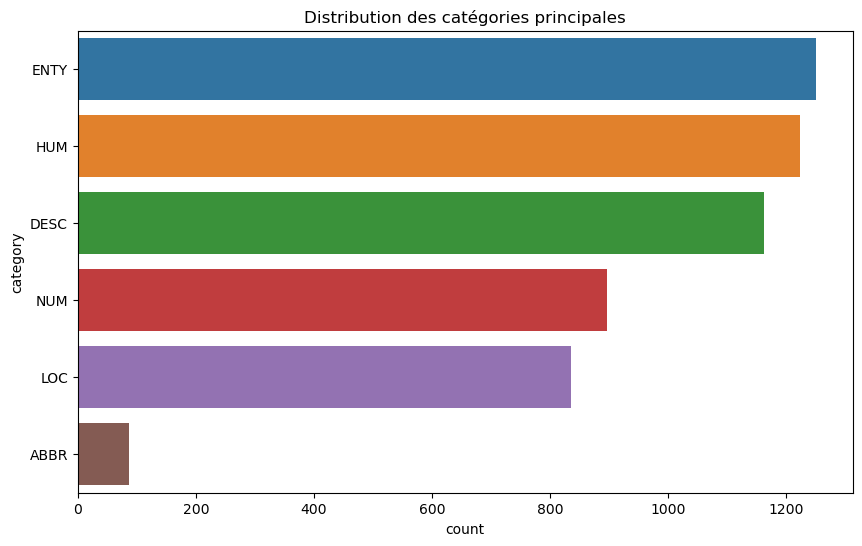

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Distribution des catégories principales')
plt.show()

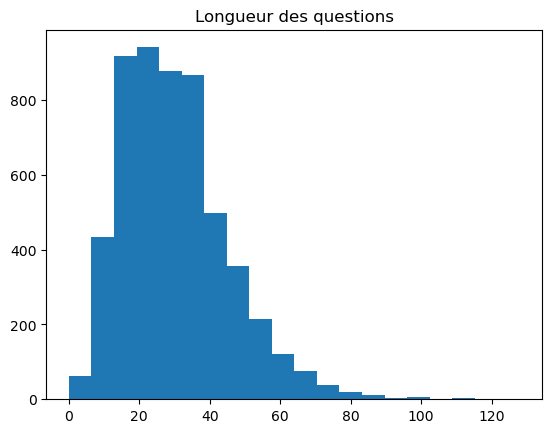

In [5]:
df['question_length'] = df['processed_question'].apply(len)
plt.hist(df['question_length'], bins=20)
plt.title('Longueur des questions')
plt.show()

In [6]:
# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['processed_question'])
y = df['category']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred)) 

Classification Report:
              precision    recall  f1-score   support

        ABBR       0.00      0.00      0.00        23
        DESC       0.62      0.54      0.58       227
        ENTY       0.55      0.68      0.61       246
         HUM       0.65      0.75      0.70       240
         LOC       0.79      0.72      0.76       166
         NUM       0.84      0.70      0.77       189

    accuracy                           0.66      1091
   macro avg       0.58      0.57      0.57      1091
weighted avg       0.66      0.66      0.66      1091



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


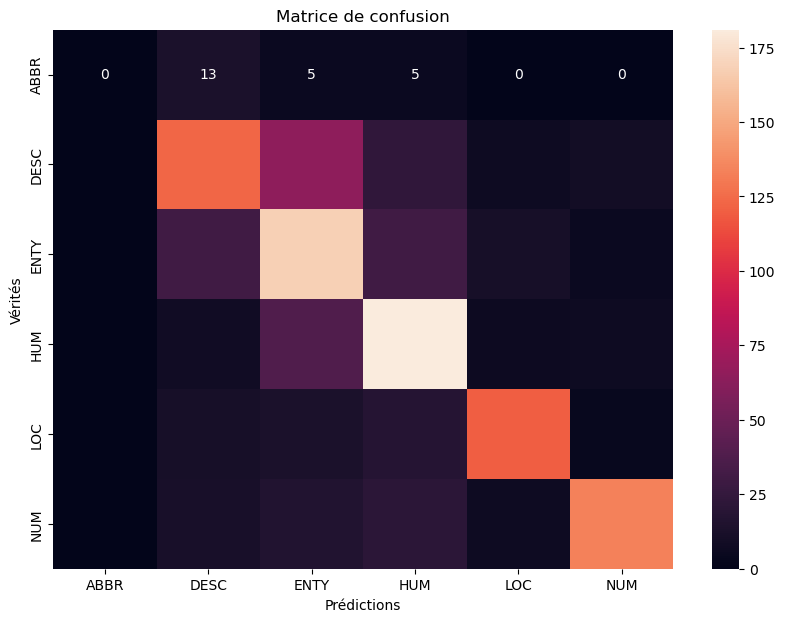

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de confusion')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)

In [12]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for class imbalance

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.66
F1 Score: 0.66
Precision: 0.66
Recall: 0.66


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


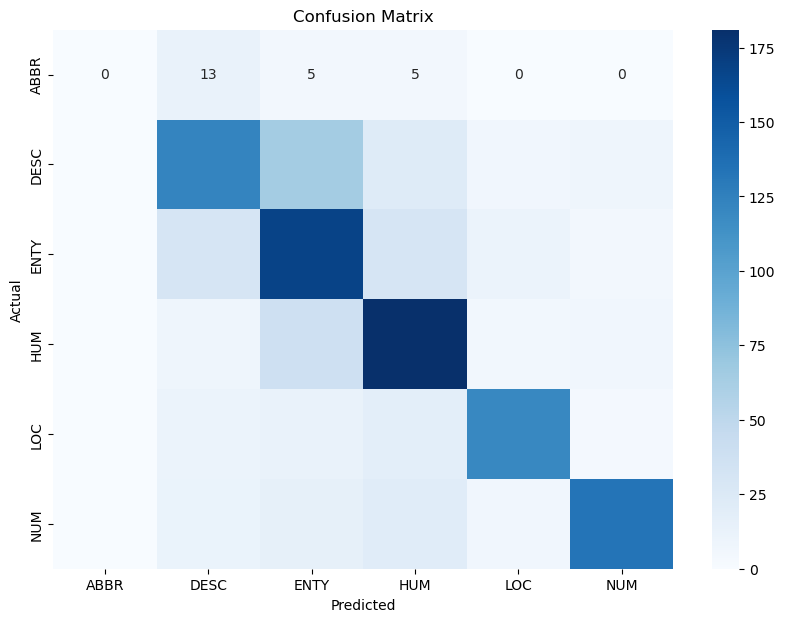

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()